In [1]:
from lstm_module import LSTM_SS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/shail/Desktop/standarddataset/Electric_Production.csv')
df['DATE']= pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [3]:
train = df.iloc[:372]
test = df.iloc[372:]

scaler = MinMaxScaler()

In [4]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

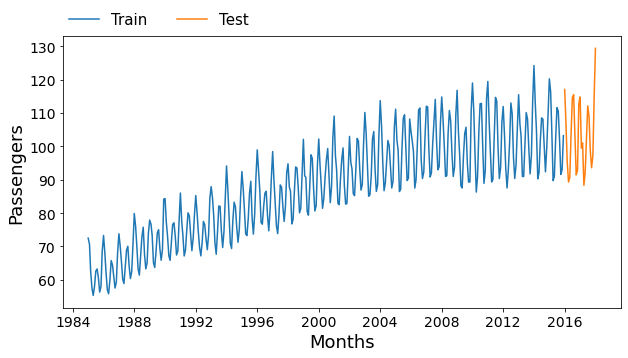

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')

plt.xlabel('Months', fontsize=18)
plt.ylabel('Passengers', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, 
           borderaxespad=0, frameon=False, prop={"size":15})

plt.show()


In [6]:
n_input = 12
n_features = 1

def generate_data(data, n_input):
    X, y = [], []
    for i in range(0,len(data)-n_input):
            X.append(data[i:i+n_input])
            y.append(data[i+n_input])
    return np.array(X), np.array(y)

X, y = generate_data(scaled_train, n_input)

# Original LSTM

In [7]:
model = Sequential()
model.add(LSTM(200, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X, y, epochs=50, verbose=0)

In [9]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.8498647], dtype=float32),
 array([0.80425876], dtype=float32),
 array([0.62523144], dtype=float32),
 array([0.4802529], dtype=float32),
 array([0.5006759], dtype=float32),
 array([0.6754012], dtype=float32),
 array([0.82250786], dtype=float32),
 array([0.7797582], dtype=float32),
 array([0.60053515], dtype=float32),
 array([0.4623867], dtype=float32),
 array([0.4972559], dtype=float32),
 array([0.6854769], dtype=float32),
 array([0.82847196], dtype=float32),
 array([0.764778], dtype=float32),
 array([0.57170606], dtype=float32),
 array([0.4342526], dtype=float32),
 array([0.47978467], dtype=float32),
 array([0.68079525], dtype=float32),
 array([0.8229134], dtype=float32),
 array([0.7486369], dtype=float32),
 array([0.54867285], dtype=float32),
 array([0.4155115], dtype=float32),
 array([0.4750107], dtype=float32),
 array([0.6880062], dtype=float32),
 array([0.82506925], dtype=float32)]

In [10]:
true_predictions = scaler.inverse_transform(test_predictions)

test['original_LSTM'] = true_predictions

<AxesSubplot:xlabel='DATE'>

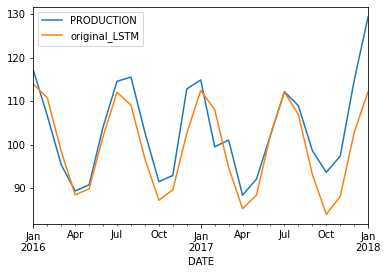

In [11]:
test.plot()

In [12]:
rmse = sqrt(mean_squared_error(test['PRODUCTION'], test['original_LSTM']))
print(rmse)

6.496326256101812


In [13]:
test

,PRODUCTION,original_LSTM
DATE,,
2016-01-01,117.0837,113.904604
2016-02-01,106.6688,110.760538
2016-03-01,95.3548,98.418431
2016-04-01,89.3254,88.423638
2016-05-01,90.7369,89.831598
2016-06-01,104.0375,101.877124
2016-07-01,114.5397,112.018627
2016-08-01,115.5159,109.071475
2016-09-01,102.7637,96.715873


# SELF_MADE_LSTM

In [14]:
self_model = LSTM_SS(1, 1, 200, n_input, 0.01)

In [15]:
self_model.fit(50, X, y, verbose=False)

In [16]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = self_model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    
test_predictions

[array([0.78928371]),
 array([0.68893104]),
 array([0.5000494]),
 array([0.4677315]),
 array([0.6029113]),
 array([0.73490452]),
 array([0.74564168]),
 array([0.64107102]),
 array([0.51260417]),
 array([0.50230743]),
 array([0.6207055]),
 array([0.72696559]),
 array([0.67829093]),
 array([0.51880018]),
 array([0.45382406]),
 array([0.55053767]),
 array([0.67975497]),
 array([0.71117981]),
 array([0.62819594]),
 array([0.51336582]),
 array([0.48554232]),
 array([0.57505352]),
 array([0.68096738]),
 array([0.6702674]),
 array([0.5423272])]

In [17]:
true_predictions = scaler.inverse_transform(test_predictions)

test['SELF_MADE_LSTM'] = true_predictions

<AxesSubplot:xlabel='DATE'>

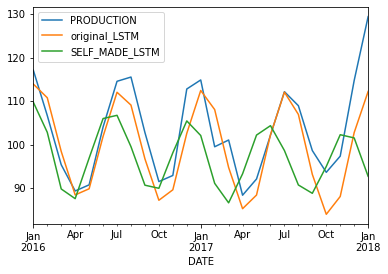

In [18]:
test.plot()

In [19]:
rmse = sqrt(mean_squared_error(test['PRODUCTION'], test['SELF_MADE_LSTM']))
print(rmse)

11.703566904350717


In [20]:
test

,PRODUCTION,original_LSTM,SELF_MADE_LSTM
DATE,,,
2016-01-01,117.0837,113.904604,109.728161
2016-02-01,106.6688,110.760538,102.809868
2016-03-01,95.3548,98.418431,89.788406
2016-04-01,89.3254,88.423638,87.560416
2016-05-01,90.7369,89.831598,96.879684
2016-06-01,104.0375,101.877124,105.979271
2016-07-01,114.5397,112.018627,106.719488
2016-08-01,115.5159,109.071475,99.510408
2016-09-01,102.7637,96.715873,90.653929
